<h3> Importing Libraries </h3>

In [1]:
import numpy as np
import pandas as pd
np.__version__

'1.22.4'

<h3> Getting the Data </h3>

In [2]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv


<h3> Loading the Data </h3>

In [3]:
data = "data.csv"
df = pd.read_csv(data, verbose=True)

Tokenization took: 18.57 ms
Type conversion took: 16.77 ms
Parser memory cleanup took: 0.00 ms


In [4]:
df.head()

print(f"Number of rows is {df.shape[0]}")
print(f"Number of columns is {df.shape[1]}")

df.columns


Number of rows is 11914
Number of columns is 16


Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

<h3> Data Cleaning </h3>

In [5]:
df.columns

# Convert the column names to lower case and replace
# space with underscore

# print(dir(df.columns.str))
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
# Create a consistent value across all columns

type(df.dtypes)

strings = df.dtypes[df.dtypes == 'object'].index
strings
df.columns

for col in list(strings):
    df[col] = df[col].str.lower()
    df[col] = df[col].str.replace(' ', '_')

df.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [7]:
df['make'].value_counts().head(3)

chevrolet     1123
ford           881
volkswagen     809
Name: make, dtype: int64

In [8]:
unique_audi_models = df['model'][df['make'] == 'audi'].nunique()
print(f"There are {unique_audi_models} unique audi models")

There are 34 unique audi models


In [9]:
series = df.isnull().sum()
columns_na = 0

for x in series:
    if x > 0:
        columns_na += 1

print(f"There are {columns_na} columns with missing values")
    

There are 5 columns with missing values


In [10]:
median_before = df['engine_cylinders'].median()
mode = df['engine_cylinders'].mode()
df["engine_cylinders"].fillna(mode, inplace=True)

df['engine_cylinders'].isnull().sum()
# mode
median_after = df['engine_cylinders'].median()

print(f"The initial median was {median_before} while the median after filling the missing values was {median_after}")


The initial median was 6.0 while the median after filling the missing values was 6.0


In [11]:
df_lotus = df.query("make=='lotus'")

x = df_lotus[["engine_hp", "engine_cylinders"]].drop_duplicates()


In [12]:
x = np.array(x)

y = np.array([1100, 800, 750, 850, 1300, 1000, 1000, 1300, 800])

xtx = x.T @ x

xtx_inv = np.linalg.inv(xtx)

w = xtx_inv @ x.T

w @ y

array([  4.59494481, -63.56432501])

<div>
  <h3> Additional stuff not related to the homework </h3>
</div>

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

# Setting seaborn as default style
sns.set()

<AxesSubplot:xlabel='msrp', ylabel='Count'>

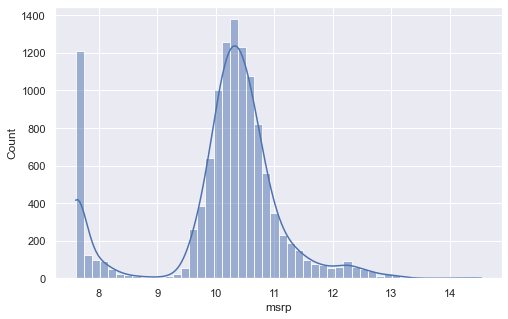

In [14]:
# Get the distribution of the price column using histogram
df['msrp'] = np.log(df['msrp'])

fig, ax = plt.subplots(figsize=((8, 5)))
sns.histplot(df['msrp'][df['msrp'] < 100000], 
             kde=True,
             bins=50)
# plt.show()


In [17]:
plt.subplots(figsize=((7, 5)))
sns.boxplot(x=df['msrp'], y=df['engine_cylinders'],
            orient='v')